# Table of Contents:
- Introduction
- problem Statement
- Objectives
- Code:
    - Installing & Importing Packages
    - Downloading & Reading Data
    - Exploratory Data Analysis
    - Data Preprocessing
    - Feature Extraction
    - Feature Importance
    - Feature Selection
    - Modeling
    - Evaluation
    - Conclustion

## Introduction 

## Problem Statement

## Objectives

## Code:
### 1) Installing Needed Packages

You might need to restart the kernel after installing them

In [96]:
# ! pip install ipywidgets
# ! pip install pandas-profiling
# ! pip install yfinance

### 2) Importing Needed libraries

In [184]:
import pandas as pd
import yfinance as yf
from pandas_profiling import ProfileReport
from ipywidgets import widgets
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

### 3) Downloading & Reading Datasets
- Downloading datasets from yahoo finance and reading the rest
- Adjusting the needed columns types from the datasets and choosing the final columns to be used
- Defining the set of rows that we will include in our analysis (Dates from 2/1/1990 till 2/11/2022) 
- Merging all datasets to form the final **df** which will be the dataset of our problem


#### TO DO: Make a function to read data and output the merged dataset instead of repeating the steps for all features

In [126]:
# HSI = yf.download("^HSI", start='1990-01-01')

In [127]:
# HSI.to_csv('HSI.csv')

In [125]:
HSI = pd.read_csv('HSI.csv')
HSI['Date'] = pd.to_datetime(HSI['Date'])
HSI = HSI[['Date', 'Adj Close']]
HSI.columns = ['Date', 'HSI_Close']
HSI = HSI[(HSI['Date']>='1990-01-02') &(HSI['Date']<='2022-11-02')]
HSI

Date     HSI_Close
0    1990-01-02   2838.100098
1    1990-01-03   2858.699951
2    1990-01-04   2868.000000
3    1990-01-05   2839.899902
4    1990-01-08   2816.000000
...         ...           ...
8105 2022-10-27  15427.940430
8106 2022-10-28  14863.059570
8107 2022-10-31  14687.019531
8108 2022-11-01  15455.269531
8109 2022-11-02  15827.169922

[8110 rows x 2 columns]

In [121]:
VKOSPI = pd.read_csv('VKOSPI.csv')
VKOSPI['Date'] = pd.to_datetime(VKOSPI['Date'])
VKOSPI = VKOSPI[['Date', 'Adj Close']]
VKOSPI.columns = ['Date', 'VKOSPI_Close']
VKOSPI = VKOSPI[(VKOSPI['Date']>='1990-01-02') &(VKOSPI['Date']<='2022-11-02')]
VKOSPI

Date  VKOSPI_Close
0    1996-12-11    704.679993
1    1996-12-12    689.380005
2    1996-12-13    689.070007
3    1996-12-16    673.919983
4    1996-12-17    663.349976
...         ...           ...
6376 2022-10-27   2288.780029
6377 2022-10-28   2268.399902
6378 2022-10-31   2293.610107
6379 2022-11-01   2335.219971
6380 2022-11-02   2336.870117

[6381 rows x 2 columns]

In [118]:
GSPC = pd.read_csv('GSPC.csv')
GSPC['Date'] = pd.to_datetime(GSPC['Date'])
GSPC = GSPC[['Date', 'Adj Close']]
GSPC.columns = ['Date', 'GSPC_Close']
GSPC = GSPC[(GSPC['Date']>='1990-01-02') &(GSPC['Date']<='2022-11-02')]
GSPC

Date   GSPC_Close
0    1990-01-02   359.690002
1    1990-01-03   358.760010
2    1990-01-04   355.670013
3    1990-01-05   352.200012
4    1990-01-08   353.790009
...         ...          ...
8270 2022-10-27  3807.300049
8271 2022-10-28  3901.060059
8272 2022-10-31  3871.979980
8273 2022-11-01  3856.100098
8274 2022-11-02  3759.689941

[8275 rows x 2 columns]

In [100]:
GSCI = pd.read_csv('GSCI.csv')
GSCI['Date'] = pd.to_datetime(GSCI['Date'])
GSCI = GSCI[['Date', 'Adj Close']]
GSCI.columns = ['Date', 'GSCI_Close']
GSCI = GSCI[(GSCI['Date']>='1990-01-02') &(GSCI['Date']<='2022-11-02')]
GSCI

Date  GSCI_Close
0    1990-01-02  212.089996
1    1990-01-03  215.639999
2    1990-01-04  212.139999
3    1990-01-05  206.919998
4    1990-01-08  199.750000
...         ...         ...
8269 2022-10-27  643.830017
8270 2022-10-28  636.530029
8271 2022-10-31  636.840027
8272 2022-11-01  641.530029
8273 2022-11-02  649.270020

[8274 rows x 2 columns]

In [101]:
VIX = pd.read_csv('VIX.csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX[['Date', 'Adj Close']]
VIX.columns = ['Date', 'VIX_Close']
VIX = VIX[(VIX['Date']>='1990-01-02') &(VIX['Date']<='2022-11-02')]
VIX

Date  VIX_Close
0    1990-01-02  17.240000
1    1990-01-03  18.190001
2    1990-01-04  19.219999
3    1990-01-05  20.110001
4    1990-01-08  20.260000
...         ...        ...
8270 2022-10-27  27.389999
8271 2022-10-28  25.750000
8272 2022-10-31  25.879999
8273 2022-11-01  25.809999
8274 2022-11-02  25.860001

[8275 rows x 2 columns]

In [102]:
CPI = pd.read_csv('CPI Data.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.columns = ['Date', 'CPI_Close']
CPI = CPI[(CPI['Date']>='1990-01-02') &(CPI['Date']<='2022-11-02')]
CPI

Date  CPI_Close
1   1990-02-01    128.000
2   1990-03-01    128.600
3   1990-04-01    128.900
4   1990-05-01    129.100
5   1990-06-01    129.900
..         ...        ...
388 2022-05-01    291.474
389 2022-06-01    295.328
390 2022-07-01    295.271
391 2022-08-01    295.620
392 2022-09-01    296.761

[392 rows x 2 columns]

In [103]:
doll_ind = pd.read_csv('Dollar Index.csv')
doll_ind['Date'] = pd.to_datetime(doll_ind['Date'])
doll_ind = doll_ind[['Date', 'Adj Close']]
doll_ind.columns = ['Date', 'Dollar_Close']
doll_ind = doll_ind[(doll_ind['Date']>='1990-01-02') &(doll_ind['Date']<='2022-11-02')]
doll_ind

Date  Dollar_Close
0     1990-01-02     94.290001
1     1990-01-03     94.419998
2     1990-01-04     92.519997
3     1990-01-05     92.849998
4     1990-01-07           NaN
...          ...           ...
10139 2022-10-28    110.669998
10140 2022-10-30           NaN
10141 2022-10-31    111.529999
10142 2022-11-01    111.480003
10143 2022-11-02    111.349998

[10144 rows x 2 columns]

In [104]:
GDP = pd.read_csv('GDP.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP.columns = ['Date', 'GDP_Close']
GDP = GDP[(GDP['Date']>='1990-01-02') &(GDP['Date']<='2022-11-02')]
GDP

Date  GDP_Close
1   1990-04-01   5960.028
2   1990-07-01   6015.116
3   1990-10-01   6004.733
4   1991-01-01   6035.178
5   1991-04-01   6126.862
..         ...        ...
126 2021-07-01  23550.420
127 2021-10-01  24349.121
128 2022-01-01  24740.480
129 2022-04-01  25248.476
130 2022-07-01  25663.289

[130 rows x 2 columns]

In [105]:
EPU = pd.read_csv('EPU.csv')
EPU['DATE'] = pd.to_datetime(EPU['DATE'])
EPU.columns = ['Date', 'EPU_Close']
EPU = EPU[(EPU['Date']>='1990-01-02') &(EPU['Date']<='2022-11-02')]
EPU

Date  EPU_Close
1827  1990-01-02     169.23
1828  1990-01-03      59.10
1829  1990-01-04      76.38
1830  1990-01-05      57.82
1831  1990-01-06     218.48
...          ...        ...
13815 2022-10-29      88.25
13816 2022-10-30     116.24
13817 2022-10-31     163.03
13818 2022-11-01     130.32
13819 2022-11-02      99.69

[11993 rows x 2 columns]

#### Merging all data into the final dataset

In [128]:
df = pd.merge(VIX, TNX,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, doll_ind,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, CPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GDP,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSCI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, EPU,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSPC,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, VKOSPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, HSI,  how='left', left_on=['Date'], right_on = ['Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [129]:
df

Date  VIX_Close  TNX_Close  Dollar_Close  CPI_Close  GDP_Close  \
0    1990-01-02  17.240000      7.940     94.290001        NaN        NaN   
1    1990-01-03  18.190001      7.990     94.419998        NaN        NaN   
2    1990-01-04  19.219999      7.980     92.519997        NaN        NaN   
3    1990-01-05  20.110001      7.990     92.849998        NaN        NaN   
4    1990-01-08  20.260000      8.020     92.050003        NaN        NaN   
...         ...        ...        ...           ...        ...        ...   
8270 2022-10-27  27.389999      3.937    110.589996        NaN        NaN   
8271 2022-10-28  25.750000      4.010    110.669998        NaN        NaN   
8272 2022-10-31  25.879999      4.077    111.529999        NaN        NaN   
8273 2022-11-01  25.809999      4.052    111.480003        NaN        NaN   
8274 2022-11-02  25.860001      4.059    111.349998        NaN        NaN   

      GSCI_Close  EPU_Close   GSPC_Close  VKOSPI_Close     HSI_Close  
0     212.089996     169.23   359.690002           NaN   2838.100098  
1     215.639999      59.10   358.760010           NaN   2858.699951  
2     212.139999      76.38   355.670013           NaN   2868.000000  
3     206.919998      57.82   352.200012           NaN   2839.899902  
4     199.750000     126.54   353.790009           NaN   2816.000000  
...          ...        ...          ...           ...           ...  
8270  643.830017     154.05  3807.300049   2288.780029  15427.940430  
8271  636.530029     200.40  3901.060059   2268.399902  14863.059570  
8272  636.840027     163.03  3871.979980   2293.610107  14687.019531  
8273  641.530029     130.32  3856.100098   2335.219971  15455.269531  
8274  649.270020      99.69  3759.689941   2336.870117  15827.169922  

[8275 rows x 11 columns]

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8275 entries, 0 to 8274
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8275 non-null   datetime64[ns]
 1   VIX_Close     8275 non-null   float64       
 2   TNX_Close     8243 non-null   float64       
 3   Dollar_Close  8273 non-null   float64       
 4   CPI_Close     253 non-null    float64       
 5   GDP_Close     71 non-null     float64       
 6   GSCI_Close    8274 non-null   float64       
 7   EPU_Close     8275 non-null   float64       
 8   GSPC_Close    8275 non-null   float64       
 9   VKOSPI_Close  6186 non-null   float64       
 10  HSI_Close     7912 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 775.8 KB


### 4) Exploratory Data Analysis
- Profile Reporting: Containing information about features: statistics and # number of missing values, etc.. and plots about distributions, interaction and correlation between features
- Time Series Plots for each feature
- Plots for target feature **VIX**; autocorrelation, seasonal decomposition, etc..
- Analysis of the major historical incidents 
- Observations and steps to do in preprocessing phase

In [131]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [132]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.93s/it]


#### Observations:
- CPI & GDP have around 90% missing values - should be dropped
- CPI & GDP are highly positively correlated - should drop one of them
- TNX is highly negatively correlated with CPI & GDP - should drop one or two of them

#### Correlation of all features with VIX 

In [185]:
df.corrwith(df["VIX_Close"])

VIX_Close       1.000000
TNX_Close      -0.087714
Dollar_Close    0.162437
CPI_Close       0.082701
GDP_Close       0.047083
GSCI_Close     -0.031642
EPU_Close       0.401285
GSPC_Close     -0.001798
VKOSPI_Close   -0.261978
HSI_Close      -0.091124
VIX_rm_3        0.874941
dtype: float64

#### Time Series Plots for all features

In [153]:
# defining function for plotting
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    sns.lineplot(data=df,x=x, y=y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


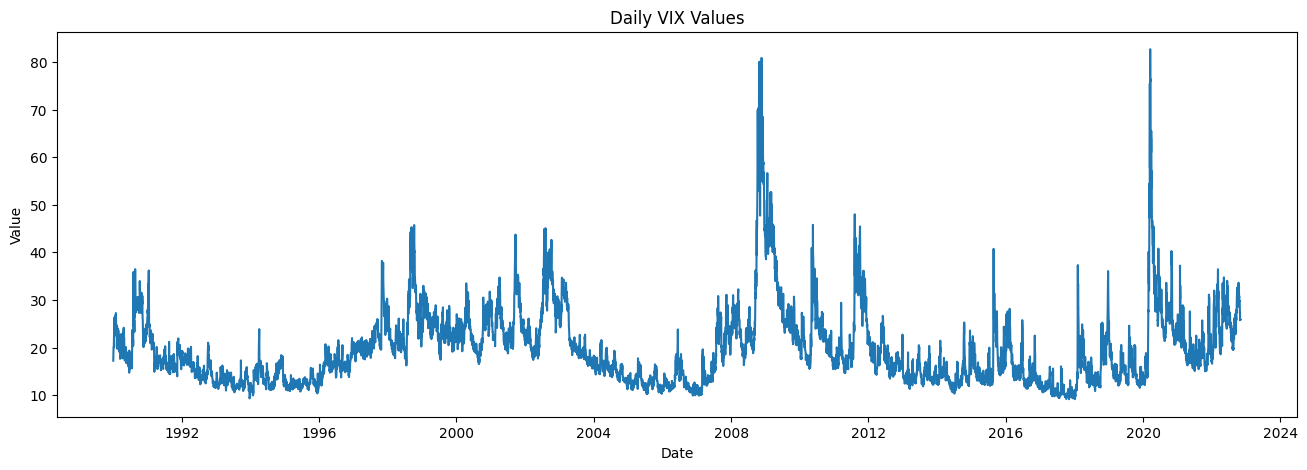

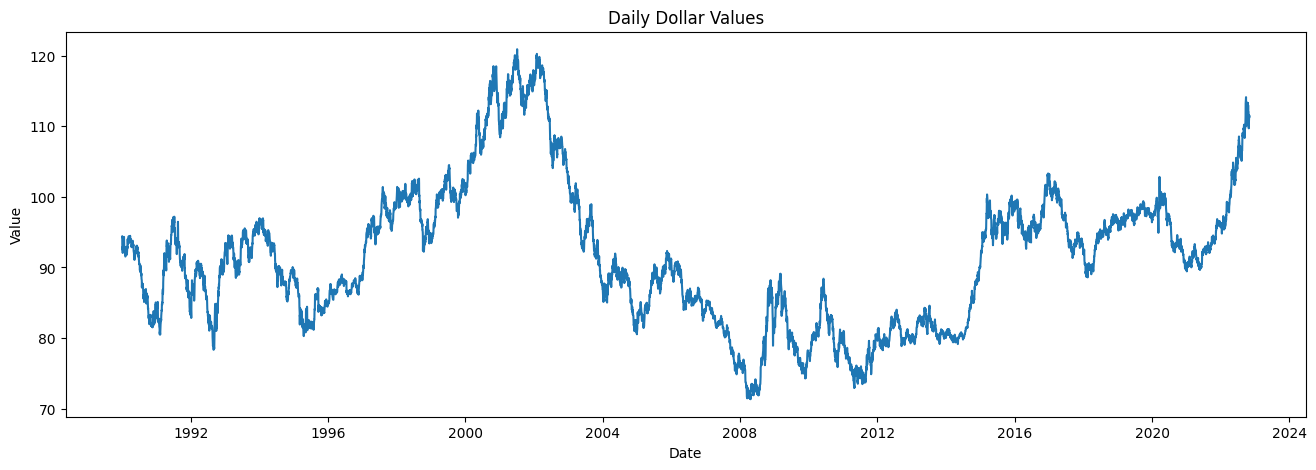

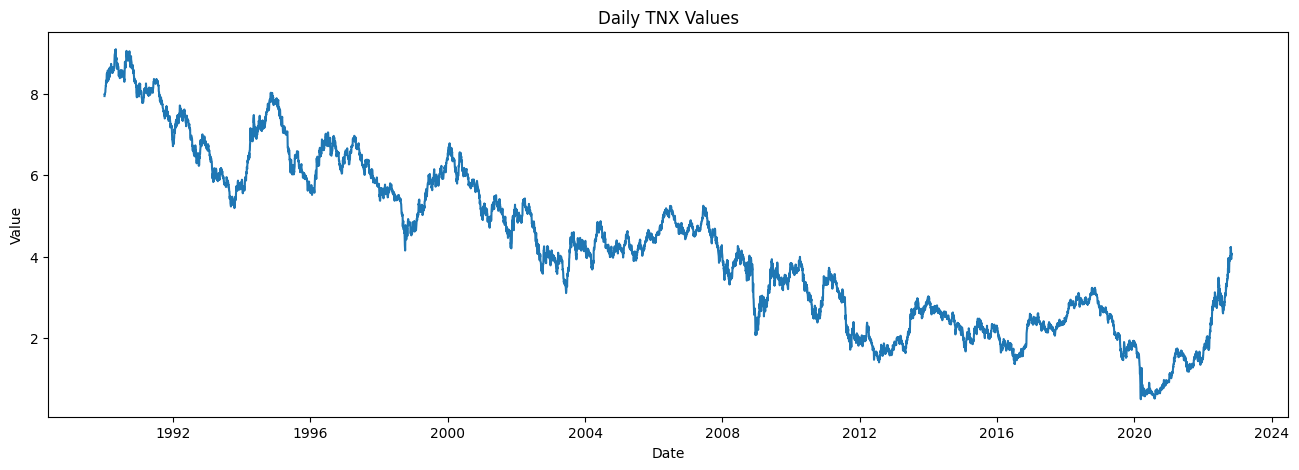

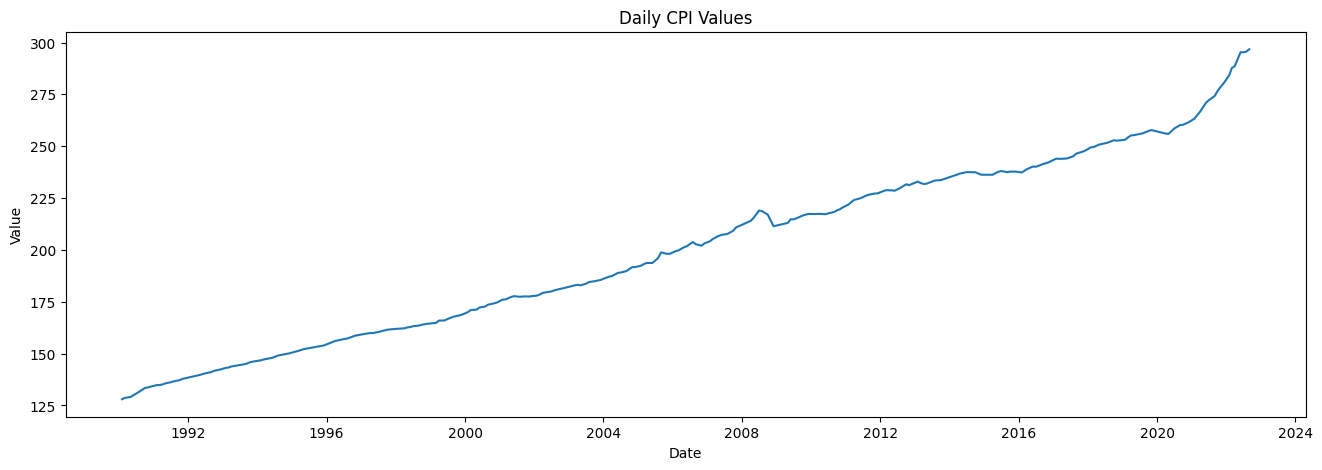

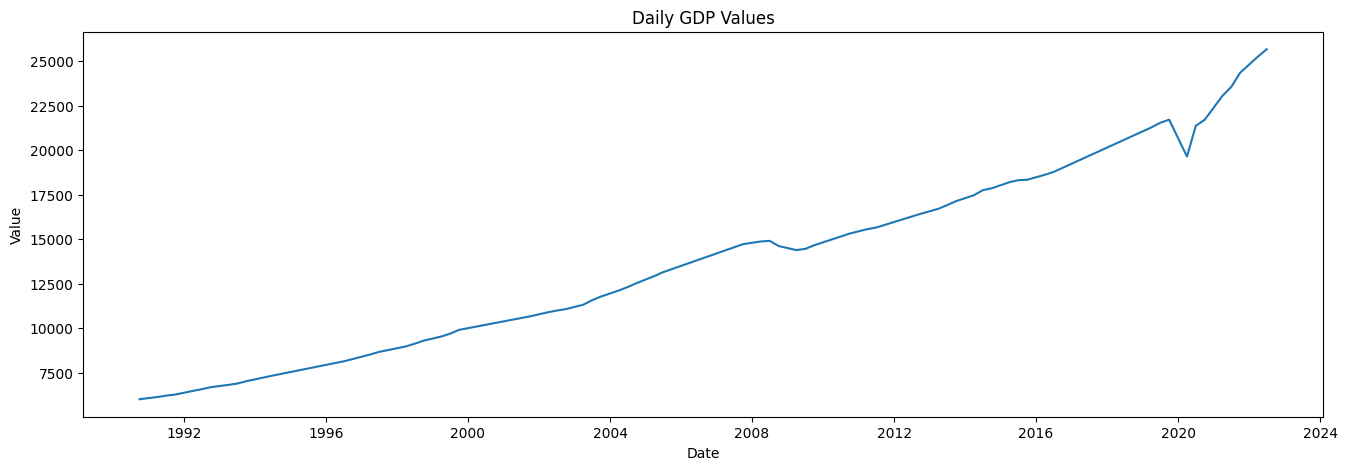

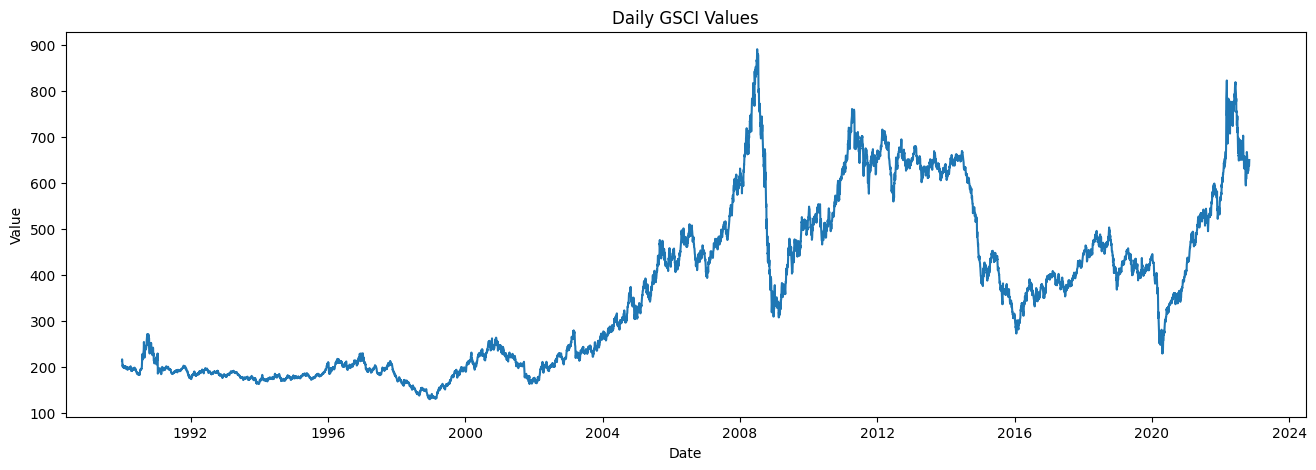

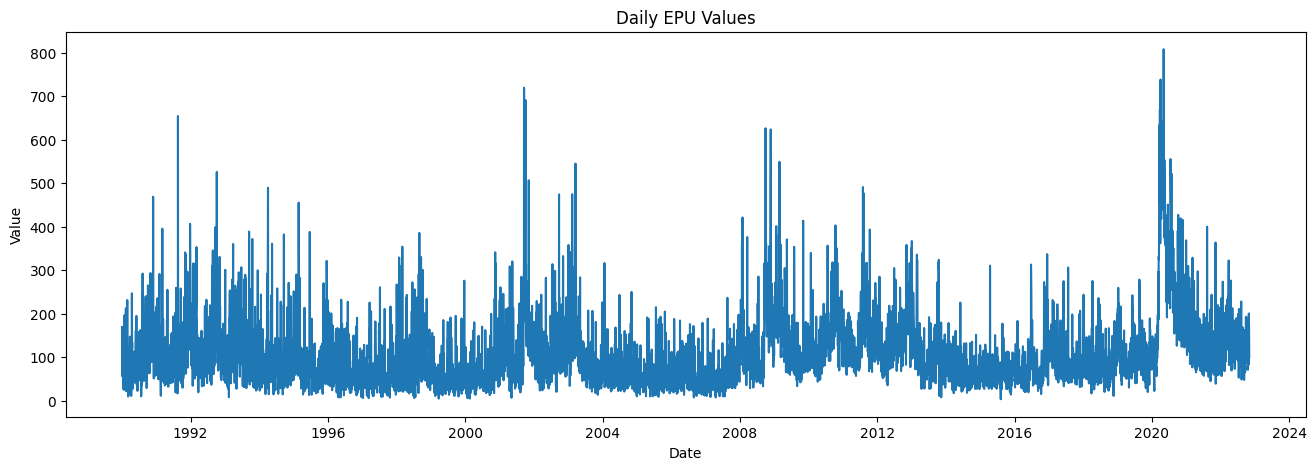

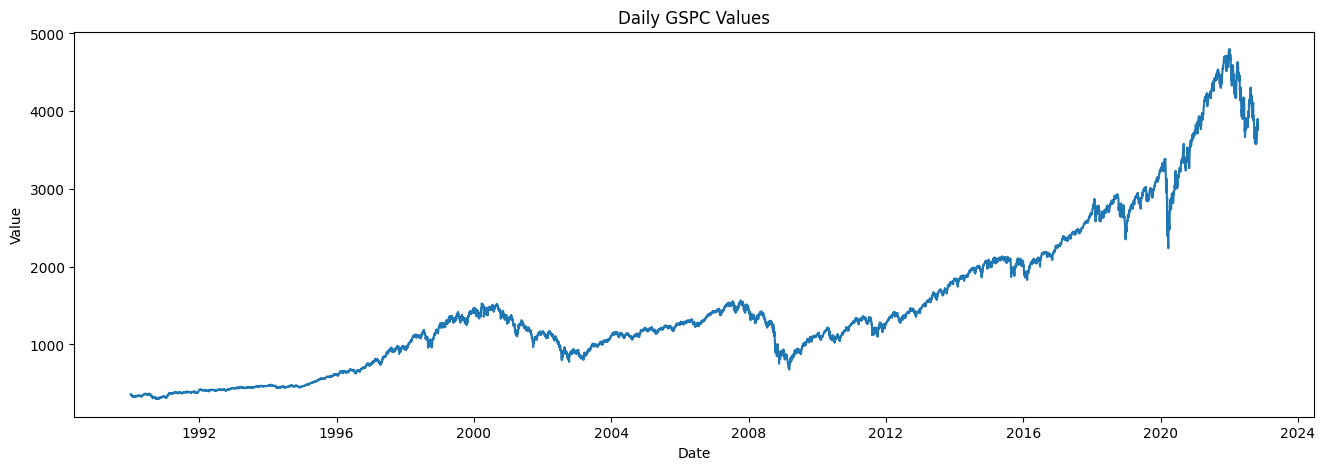

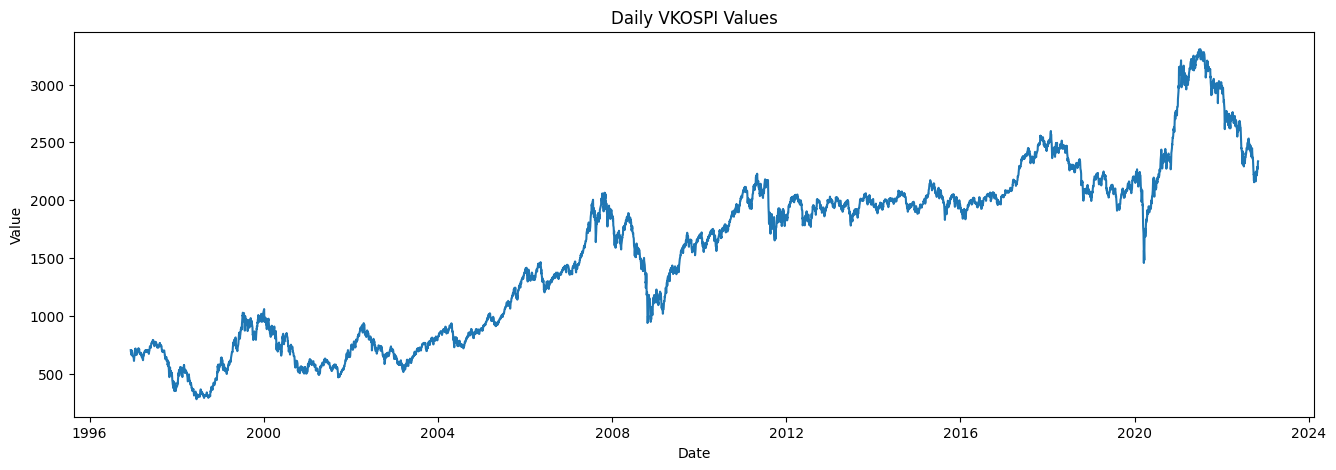

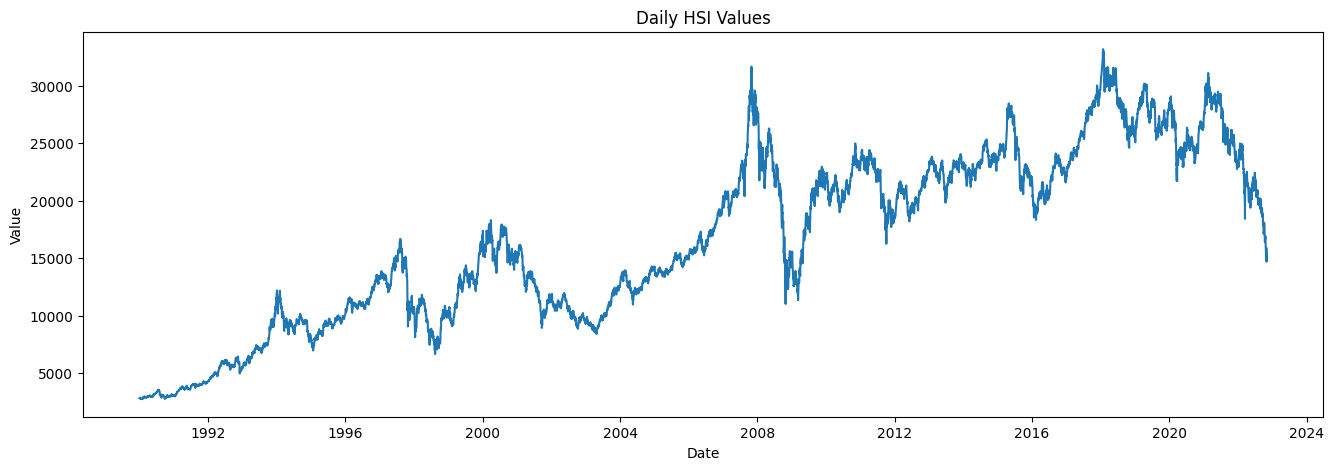

In [159]:
plot_df(df, 'Date', 'VIX_Close', title="Daily VIX Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'Dollar_Close', title="Daily Dollar Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'TNX_Close', title="Daily TNX Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'CPI_Close', title="Daily CPI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GDP_Close', title="Daily GDP Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GSCI_Close', title="Daily GSCI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'EPU_Close', title="Daily EPU Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GSPC_Close', title="Daily GSPC Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'VKOSPI_Close', title="Daily VKOSPI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'HSI_Close', title="Daily HSI Values", xlabel='Date', ylabel='Value', dpi=100)

#### Plotting ACF and PACF for VIX

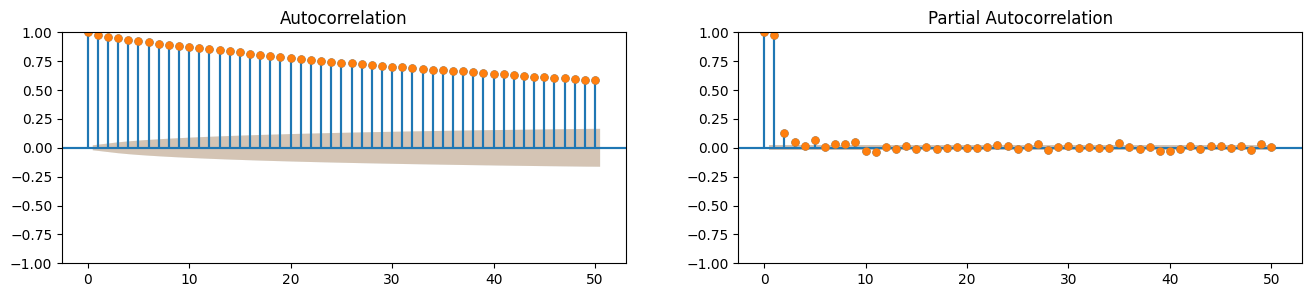

In [163]:
plot_acf(df.VIX_Close.tolist(), lags=50, ax=axes[0])
plot_pacf(df.VIX_Close.tolist(), lags=50, ax=axes[1])

### 5) Data Preprocessing
- Dropping unuseful features
- Dealing with missing data
- Seasonal Decomposition
- Smoothing

#### Dropping un-useful features

#### Dealing with missing data

#### Seasonal Decomposition

In [137]:
# # Need to fill missing values first

# from statsmodels.tsa.seasonal import seasonal_decompose
# from matplotlib import pyplot
# df.index = df['Date']
# result = seasonal_decompose(df['VIX_Close'], model='additive')
# result.plot()
# pyplot.show()

#### Granger Causality Test

In [183]:
# from statsmodels.tsa.stattools import grangercausalitytests
# # Should fill missing values
# grangercausalitytests(df[['VIX_Close', 'EPU_Close']], maxlag=1)

#### Smoothing time series using Moving Average

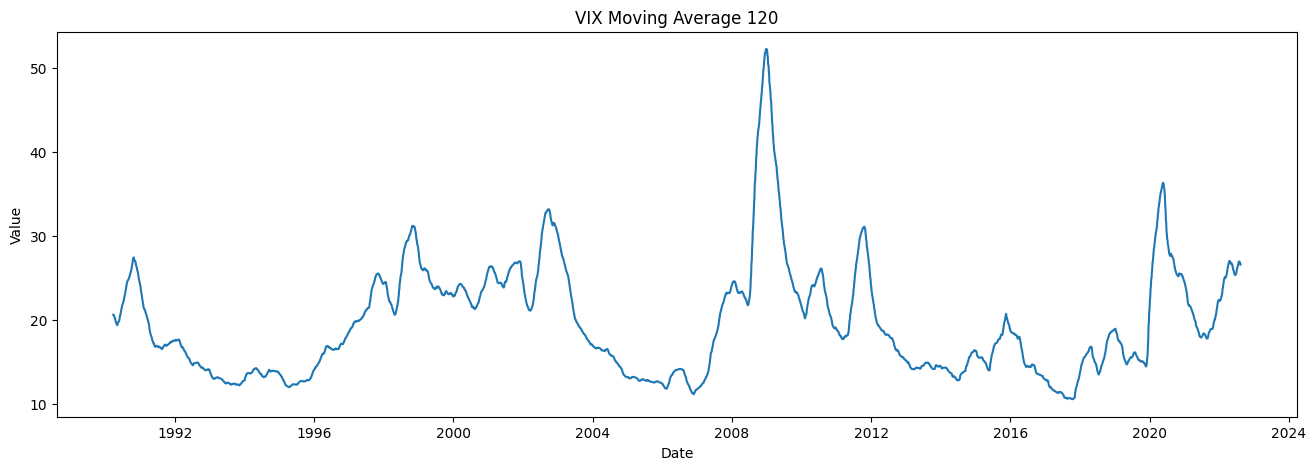

In [175]:
df['VIX_rm_3'] = df.VIX_Close.rolling(120, center=True, closed='both').mean()
# df_ma['Date'] = df.Date
# df_ma.plot()
plot_df(df, 'Date', 'VIX_rm_3', title="VIX Moving Average 120", xlabel='Date', ylabel='Value', dpi=100)

# Extra Points:

- feature extraction: last week average, min, max, std - daily lag, weekly lag, monthly lag
- Criteria: RMSE or AIC or BIC
- Using Moving Average
- Volatility trend -> based on percentage change and checking the frequency of trends
- Normalization


Models: Try modeling volatility on its own and using predictive features
- regularization (ridge, lasso, elastic net), tree-based algorithms (bagging, random forest, gradient boosting)
- tree-based algorithms (bagging, random forest, gradient boosting)
- artificial neural networks (ANN)
- k-Nearest Neighbours (kNN)
- support vector regression (SVR)

Points:
- out-of-sample forecasting: train - validation - test
- variable importance via accumulated local effect (ALE) plots - SHAP Values
- Correlation between predictors and VIX, can be one of the feature selection methods

Main Events:
- the financial crisis in 2008 – 2009
- the European sovereign debt crisis
- several rounds of dispute about the U.S. debt ceiling
- the flash crashes of 6 May 2010 and 24 August 2015.

Additional Features:
- US 1-month T-bill rate (US1M) : https://www.investing.com/rates-bonds/u.s.-1-month-bond-yield-historical-data
- the Economic Policy Uncertainty (EPU) index : https://fred.stlouisfed.org/series/USEPUINDXD